In [ ]:
import keras
from keras.datasets import mnist

In [ ]:
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


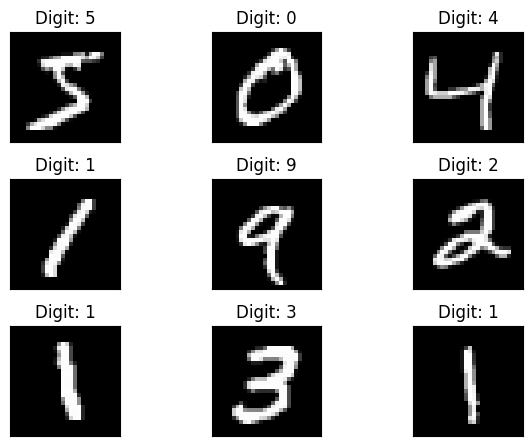

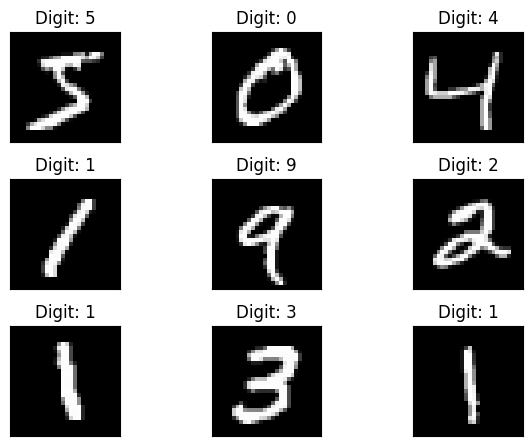

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:

img_rows, img_cols=28, 28

if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28, 1)


In [ ]:
print('Y_train shape:', y_train.shape)

Y_train shape: (60000,)


In [ ]:
print('X_test shape:', X_test.shape)

X_test shape: (10000, 28, 28, 1)


In [ ]:
print('Y_test shape:', y_test.shape)

Y_test shape: (10000,)


In [ ]:
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

3rd - try Model Architecture

In [ ]:
from keras import layers,models
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten


##model building
model = models.Sequential()


#convolutional layer with rectified linear unit activation
#32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

#64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))

#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

#dropout layer
model.add(Dropout(0.25))

model.add(Flatten())

#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))

#Second drop out for convergence
model.add(Dropout(0.5))

#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))


3rd - try compiling the model

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

3rd- Try model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

3rd -try model training

In [ ]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 161s 341ms/step - loss: 30.5871 - accuracy: 0.1595 - val_loss: 4.4191 - val_accuracy: 0.4605
Epoch 2/10
469/469 [==============================] - 158s 338ms/step - loss: 13.3154 - accuracy: 0.2792 - val_loss: 1.9255 - val_accuracy: 0.6172
Epoch 3/10
469/469 [==============================] - 160s 341ms/step - loss: 7.0666 - accuracy: 0.3578 - val_loss: 1.2549 - val_accuracy: 0.6311
Epoch 4/10
469/469 [==============================] - 168s 357ms/step - loss: 4.3450 - accuracy: 0.3812 - val_loss: 1.2225 - val_accuracy: 0.5868
Epoch 5/10
469/469 [==============================] - 164s 349ms/step - loss: 3.0224 - accuracy: 0.3765 - val_loss: 1.4016 - val_accuracy: 0.5410
Epoch 6/10
469/469 [==============================] - 159s 339ms/step - loss: 2.4269 - accuracy: 0.3764 - val_loss: 1.5223 - val_accuracy: 0.5075
Epoch 7/10
469/469 [==============================] - 158s 337ms/step - loss: 2.1401 - accuracy: 0.3830 - val_loss: 1.5554

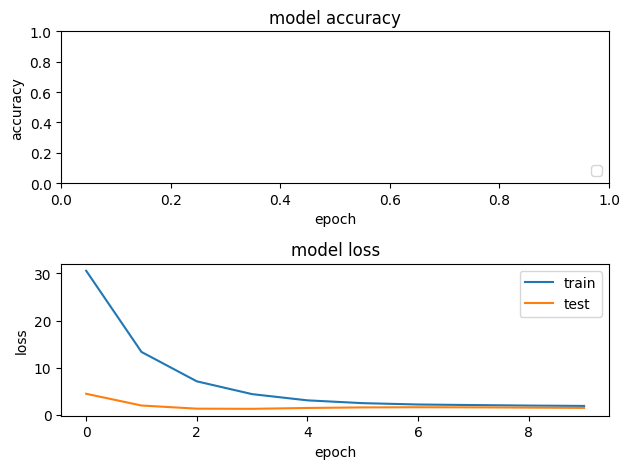

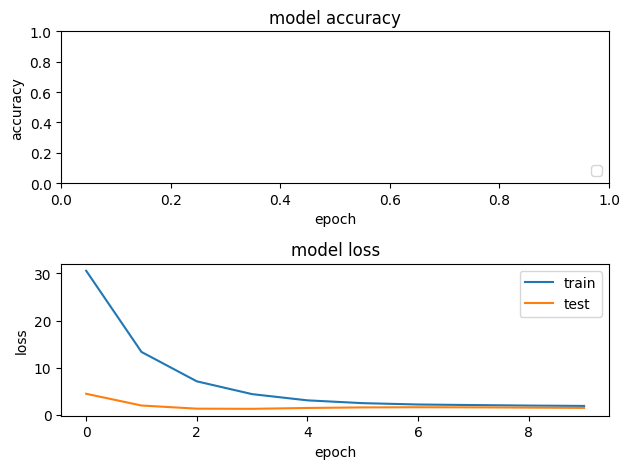

In [ ]:
import os

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

# **Evaluating the model 3rd - try**

In [ ]:
#evaluating the model after 300 epochs
test_loss,test_acc = model.evaluate(X_test,y_test)
print("Accuracy after 300 iteration is ",test_acc)
print("Loss metric after 300 iterations is",test_loss)

313/313 [==============================] - 8s 24ms/step - loss: 1.4171 - accuracy: 0.5595
Accuracy after 300 iteration is  0.559499979019165
Loss metric after 300 iterations is 1.4171347618103027


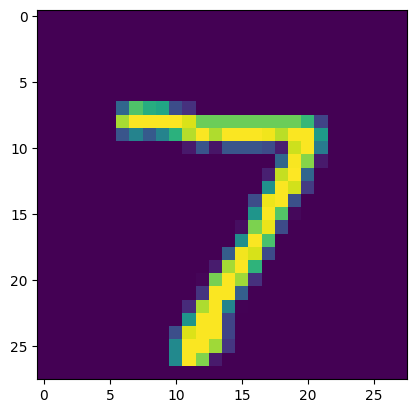

In [ ]:
plt.imshow(X_test[0])

In [ ]:
import numpy as np

result = model.predict(np.array([X_test[0]]))
predicted_value = np.argmax(result)
print(predicted_value)

1/1 [==============================] - 0s 347ms/step
7


3rd-try model predicting the first 25 images

In [ ]:

test_predict = []
for x in range(25):

  result = model.predict(np.array([X_test[x]]))
  predicted_value = np.argmax(result)
  test_predict.append(predicted_value)



1/1 [==============================] - 0s 24ms/step


Printing the predicted 25 test images of 3rd-try model

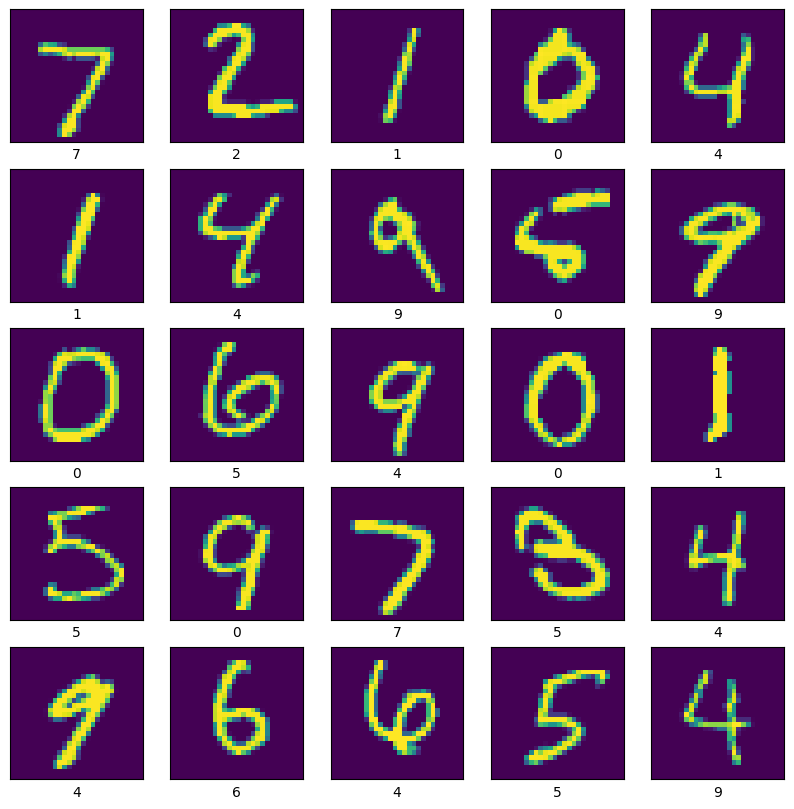

In [ ]:
plt.figure(figsize = (10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([True])
  plt.grid(True)
  plt.imshow(X_test[i])
  plt.xlabel(test_predict[i])

plt.show()